## 形态学概述

<font size=3>形态学图像处理（简称形态学）是指一系列处理图像形状特征的图像处理技术。<br>
形态学的基本思想是利用一种特殊的结构元来测量或提取输入图像中相应的形状或特征，以便进一步进行图像分析和目标识别<br>
本质和其他滤波器一样，都能够对图像进行去噪、增强等作用  <br>
常用的基本操作有:膨胀和腐蚀、开运算、闭运算、顶帽、黑帽</font>

## 图像全局二值化

<font size=3>二值化:将图像的每个像素变成两种值，0和255<br><br></font>
<font size = 4>threshold(src,thresh,maxval,type[,dst]) </font>

<font size = 3>src:最好是灰度图<br>
thresh:阈值<br>
maxval:最大值，最大值不一定是255<br>
type:操作类型    </font>

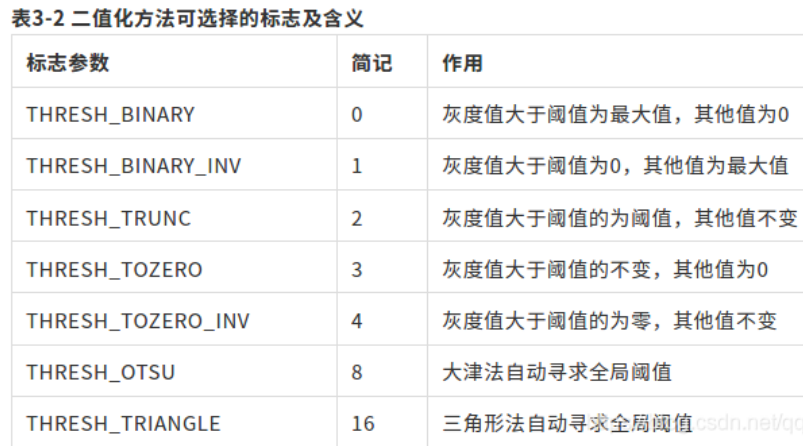

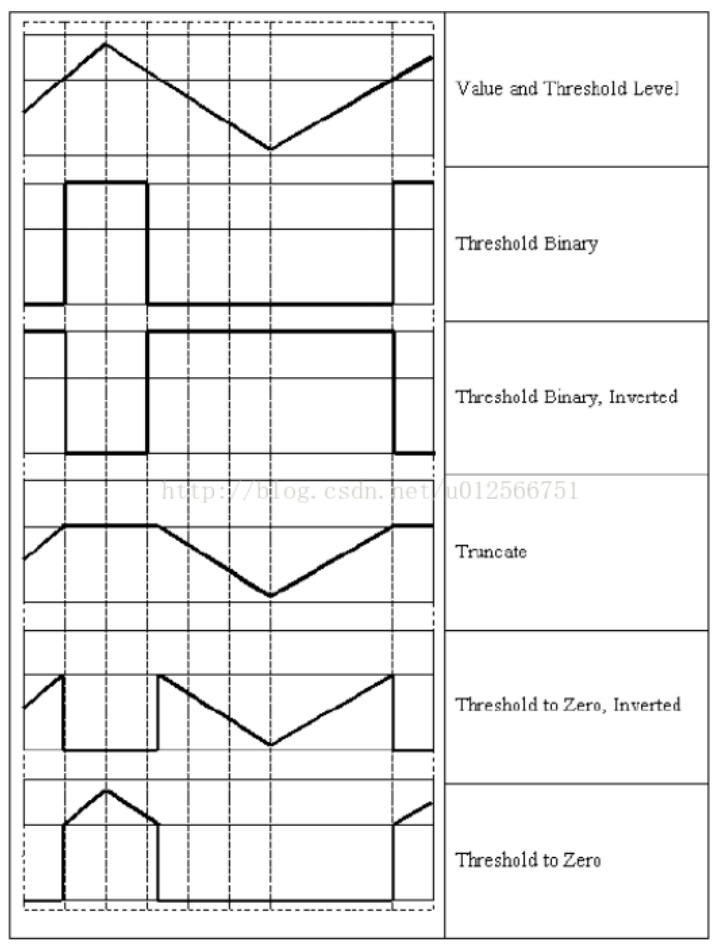

### THRESH_BINARY和THRESH_BINARY_INV:

<font size=3>
这两个是相反的二值化方法:<br>THRESH_BINARY是将灰度值与阈值（thresh）进行比较，如果灰度值大于阈值就将灰度值改为函数中第四个参数maxval的值，否则将灰度值改成0<br>
THRESH_BINARY_INV:标志正好与这个过程相反，如果灰度值大于阈值就将灰度值改为0，否则将灰度值改为maxval的值<br></font>

### THRESH_TRUNC和THRESH_TOZERO和THRESH_TOZERO_INV：

<font size=3>这三个也是相反的二值化方法:<br>THRESH_TRUNC:过门限的值为门限值，其他值不变<br>
THRESH_TOZERO:过门限的值不变，其他设置为0<br>
THRESH_TOZERO_INV:过门限的值为0，其他不变</font>

### demo:

In [2]:
import cv2
import numpy as np
img = cv2.imread('./1.aidaishu.jpg')
img = cv2.resize(img,(378,504))
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [3]:
thresh,img_binary = cv2.threshold(gray,130,255,cv2.THRESH_BINARY)   #threshold有两个返回值，--->越小越白
cv2.imshow('img_binary',np.hstack((gray,img_binary)))
cv2.waitKey()
cv2.destroyAllWindows()

## 自适应阈值二值化

### adaptiveThreshold(src,maxValue,adaptiveMethod,thresholdType,blockSize,C,dst=None)

<font size=3> src：输入8位单通道图像。<br>
dst：输出图像，大小和类型与src相同。<br>
maxValue：满足条件的像素所分配的非零值。<br>
adaptiveMethod：要使用的自适应阈值算法，ADAPTIVE_THRESH_MEAN_C或者ADAPTIVE_THRESH_GAUSSIAN_C<br>
thresholdType：阈值类型，必须是THRESH_BINARY或者HRESH_BINARY_INV，指示要提取亮区域还是暗区域<br>
blockSize：用于计算像素阈值的像素邻域的大小:3,5,7，以此类推。<br>
C：偏移值调整量，从每个邻域计算出的平均值或高斯加权平均值中减去的常量，就是最终阈值，它可以是正的，也可以是零或负的。</font>

### demo:

In [4]:
#自适应阈值二值化只有一个返回值
img_adaptive = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,5,0)  
cv2.imshow('img_binary',np.hstack((gray,img_adaptive)))
cv2.waitKey()
cv2.destroyAllWindows()

## 腐蚀操作

<font size=3>作用:<br>
消除噪声<br>
分割独立的图像元素，及连接相邻的元素<br>
寻找图像中明显的极大值区或极小值区域</font>

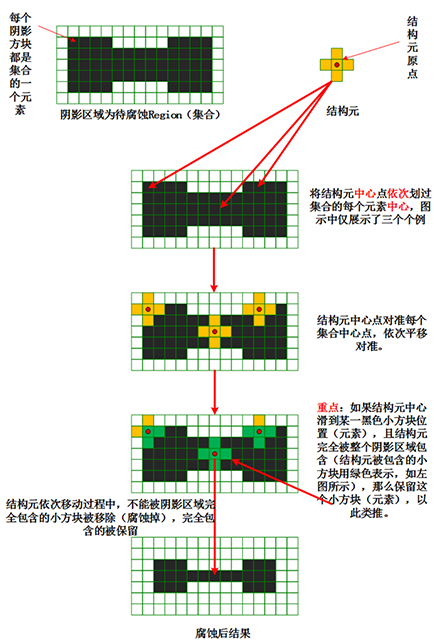

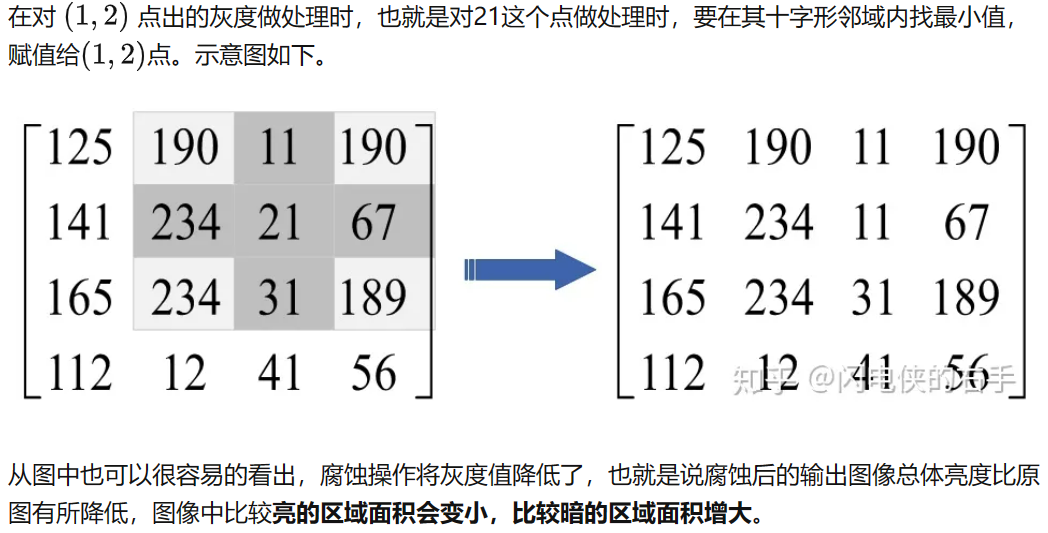

### cv2.erode()腐蚀：将前景物体变小，理解成将图像断开裂缝变大（在图片上画上黑色印记，印记越来越大）

### dst = cv2.erode(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]])

<font size = 3> kernel->腐蚀使用的核<br>
        anchor->可选参数,核的锚点位置<br>
        iterations->可选参数,腐蚀操作的迭代次数，默认值为1<br>
        borderType->可选参数,边界样式,建议默认<br>
        borderValue->可选参数,边界值,建议默认</font>

In [5]:
kernel = np.ones((3,3),np.uint8)
img_1 = cv2.erode(gray,kernel,iterations = 10)   #iterations--->腐蚀的次数
cv2.imshow('erode',np.hstack((gray,img_1)))
cv2.waitKey()
cv2.destroyAllWindows()

### 获取形态学卷积核

<font size=4>getStructuringElement(shape,ksize[,anchor]) </font>

<font size=3>shape:指的是卷积核的形状(卷积核中1形成的形状)，并非指长和宽<br>
MORPH_RECT:卷积核中的1是矩形<br>
MORPH_ELLIPSE:椭圆<br>
MORPH_CROSS:十字</font>

In [6]:
kernel_1 =  cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5)) 
print(kernel_1)

[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


In [7]:
img_2 = cv2.erode(gray,kernel_1)
cv2.imshow('getElement',img_2)
cv2.waitKey()
cv2.destroyAllWindows()

## 膨胀操作(dilate)

<font size=3>膨胀是腐蚀的相反操作，只要锚点是非0值，周边无论是0还是非0值，都会变成非0值</font>

In [8]:
img_3 = cv2.dilate(gray,kernel_1,iterations = 1)
cv2.imshow("dilate",img_3)
cv2.waitKey()
cv2.destroyAllWindows()

## 先腐蚀，再膨胀

In [10]:
img_4 = cv2.dilate(img_2,kernel_1,iterations = 1)
cv2.imshow('after',img_4)
cv2.waitKey()
cv2.destroyAllWindows()